### Part B:

In [2]:
import numpy as np

# Load data from 'datalinear.txt' with columns x, y, σxi, σyi
data = np.loadtxt('datalinear.txt')
x = data[:, 0]
y = data[:, 1]
sigma_x = data[:, 2]
sigma_y = data[:, 3]

# Calculate weights
weights = 1 / (sigma_y**2 + sigma_x**2)

# Calculate weighted means for x, y, x^2, and xy
weighted_mean_x = np.sum(weights * x) / np.sum(weights)
weighted_mean_y = np.sum(weights * y) / np.sum(weights)
weighted_mean_x2 = np.sum(weights * x**2) / np.sum(weights)
weighted_mean_xy = np.sum(weights * x * y) / np.sum(weights)

# Calculate the best-fit slope (m) and intercept (c)
m = (weighted_mean_xy - weighted_mean_x * weighted_mean_y) / (weighted_mean_x2 - weighted_mean_x**2)
c = weighted_mean_y - m * weighted_mean_x

# Output the results
print(f"Best-fit slope (m): {m}")
print(f"Best-fit intercept (c): {c}")



Best-fit slope (m): 0.23346108992778764
Best-fit intercept (c): 1.6366389735856919


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('data_6.txt')
x = data[:, 0]
y = data[:, 1]

# Set uncertainty ranges
sigmax_min, sigmax_max = 0.5, 5
sigmay_min, sigmay_max = 2, 5

# Generate new data points with uncertainties
newx, newy = [], []
for i in range(10):
    for j in range(20):
        n = np.random.uniform(x[i] * sigmax_min, x[i] * sigmax_max)
        m = np.random.uniform(y[i] * sigmay_min, y[i] * sigmay_max)
        newx.append(n)
        newy.append(m)

# Convert newx and newy to numpy arrays for calculations
newx = np.array(newx)
newy = np.array(newy)

# Calculate uncertainties for newx and newy
sigma_x = np.std(newx)
sigma_y = np.std(newy)

# Calculate weighted means
weights = 1 / (sigma_y**2 + sigma_x**2)  # Adjust weights if needed based on error model
mean_x = np.sum(weights * newx) / np.sum(weights)
mean_y = np.sum(weights * newy) / np.sum(weights)

# Calculate sums for slope (a) and intercept (b)
S_xx = np.sum(weights * (newx - mean_x)**2)
S_xy = np.sum(weights * (newx - mean_x) * (newy - mean_y))

# Slope (a) and intercept (b) calculations
a = S_xy / S_xx
b = mean_y - a * mean_x

# Plot the data with error bars and fitted line
plt.errorbar(newx, newy, xerr=sigma_x, yerr=sigma_y, fmt='o', label="Data with error bars")
plt.plot(newx, a * newx + b, color='red', label=f"Fit: y = {a:.2f}x + {b:.2f}")
plt.xlabel("Generated X")
plt.ylabel("Generated Y")
plt.legend()
plt.show()


Best-fit slope (m): 0.23346108992778764
Best-fit intercept (c): 1.6366389735856919


### Part C: Calculating the Uncertainties in Slope ( sigma_m ) and Intercept (sigma_c ).

#### Key Definitions
1. **Weights**: Given data points \( (x_i, y_i) \) with uncertainties \( \sigma_{xi} \) in \( x \) and \( \sigma_{yi} \) in \( y \), we define the weights as:
   $$
   w_i = \frac{1}{\sigma_{yi}^2 + \sigma_{xi}^2}
   $$

2. **Weighted Mean of \( x \)**:
   $$
   \bar{x}_w = \frac{\sum_i w_i x_i}{\sum_i w_i}
   $$

3. **Weighted Mean of \( x^2 \)**:
   $$
   \bar{x^2}_w = \frac{\sum_i w_i x_i^2}{\sum_i w_i}
   $$

4. **Weighted Variance \( S_{xx} \)**: The weighted variance of \( x \), denoted \( S_{xx} \), is calculated as:
   $$
   S_{xx} = \sum_i w_i (x_i - \bar{x}_w)^2
   $$
   Alternatively, this can be written as:
   $$
   S_{xx} = \sum_i w_i x_i^2 - \frac{\left( \sum_i w_i x_i \right)^2}{\sum_i w_i}
   $$

#### Formulas for Uncertainties
Using \( S_{xx} \), we calculate the uncertainties in \( m \) (slope) and \( c \) (intercept):

1. **Uncertainty in Slope (\( \sigma_m \))**:
   $$
   \sigma_m = \sqrt{\frac{1}{S_{xx}}}
   $$

2. **Uncertainty in Intercept (\( \sigma_c \))**:
   $$
   \sigma_c = \sqrt{\frac{\bar{x^2}_w}{S_{xx}}}
   $$

These uncertainties, \( \sigma_m \) and \( \sigma_c \), provide the standard errors for the best-fit slope and intercept, taking into account the uncertainties \( \sigma_{xi} \) and \( \sigma_{yi} \) for each data point.


In [21]:
# Calculate the weighted variance S_xx
S_xx = np.sum(weights * (x - weighted_mean_x)**2)

# Calculate sigma_m and sigma_c
sigma_m = np.sqrt(1 / S_xx)
sigma_c = np.sqrt(weighted_mean_x2 / S_xx)

# Output the uncertainties
print(f"Uncertainty in slope (σ_m): {sigma_m}")
print(f"Uncertainty in intercept (σ_c): {sigma_c}")


Uncertainty in slope (σ_m): 0.0013623775227295486
Uncertainty in intercept (σ_c): 0.007356425733064748


### Part D
For part D, we can use Python's scipy.stats.linregress or numpy.polyfit functions, which perform linear regression and calculate best-fit values for the slope and intercept. Additionally, we’ll use scipy.odr (Orthogonal Distance Regression) to include uncertainties in both 
𝑥
 and 
𝑦
 for comparison.

In [29]:
import numpy as np
from scipy import stats, odr


# Standard Linear Regression (ignoring uncertainties)
slope_std, intercept_std, _, _, _ = stats.linregress(x, y)

print("Standard Linear Regression (Ignoring Uncertainties):")
print(f"Slope (m): {slope_std}")
print(f"Intercept (c): {intercept_std}")

# Orthogonal Distance Regression (ODR) - including uncertainties
def linear_model(B, x):
    return B[0] * x + B[1]

# Create the model and data objects for ODR
linear = odr.Model(linear_model)
data_odr = odr.RealData(x, y, sx=sigma_x, sy=sigma_y)

# Set up the ODR object with an initial guess for m and c
odr_obj = odr.ODR(data_odr, linear, beta0=[slope_std, intercept_std])
odr_output = odr_obj.run()

# Extract the ODR results
slope_odr, intercept_odr = odr_output.beta
sigma_m_odr, sigma_c_odr = odr_output.sd_beta

print("\nOrthogonal Distance Regression (Including Uncertainties):")
print(f"Slope (m): {slope_odr} ± {sigma_m_odr}")
print(f"Intercept (c): {intercept_odr} ± {sigma_c_odr}")



Standard Linear Regression (Ignoring Uncertainties):
Slope (m): 0.23345053132840043
Intercept (c): 1.6409719075503728

Orthogonal Distance Regression (Including Uncertainties):
Slope (m): 0.2138067121388235 ± 0.00326704968629848
Intercept (c): 1.7676971428476744 ± 0.013680354126647302


### Part E:

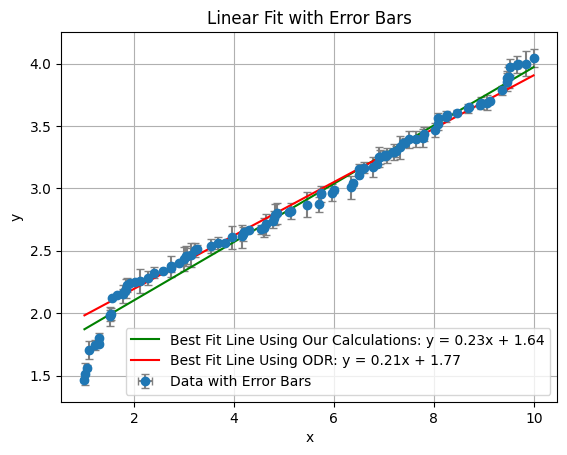

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already loaded x, y, sigma_x, sigma_y, slope_odr, and intercept_odr from previous steps

# Generate x values for the fitted line plot
x_fit = np.linspace(min(x), max(x), 100)
y_fit = m * x_fit + c
y_fit_odr = slope_odr * x_fit + intercept_odr

# Plot data points with error bars
plt.errorbar(x, y, xerr=sigma_x, yerr=sigma_y, fmt='o', ecolor='gray', capsize=3, label='Data with Error Bars')

# Plot the fitted line
plt.plot(x_fit, y_fit, color='green', label=f'Best Fit Line Using Our Calculations: y = {m:.2f}x + {c:.2f}')

plt.plot(x_fit, y_fit_odr, color='red', label=f'Best Fit Line Using ODR: y = {slope_odr:.2f}x + {intercept_odr:.2f}')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit with Error Bars')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [4]:
import numpy as np

# Define the transition matrix P
P = np.array([
    [0, 1/3, 1/3],
    [1/2, 0, 2/3],
    [1/2, 2/3, 0]
])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[-0.33333333  1.         -0.66666667]

Eigenvectors:
[[-8.16496581e-01  4.26401433e-01 -2.06103471e-16]
 [ 4.08248290e-01  6.39602149e-01 -7.07106781e-01]
 [ 4.08248290e-01  6.39602149e-01  7.07106781e-01]]


In [8]:
import numpy as np

# Define the transition matrix P
P = np.array([
    [0, 1/3, 1/3],
    [1/2, 0, 2/3],
    [1/2, 2/3, 0]
])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P)
Q = eigenvectors
Q_inv = np.linalg.inv(Q)

# Define the initial state vector v0 (example: starting in the first state)
v0 = np.array([0, 0, 1])  # Adjust this vector based on your starting state

# Define N (number of steps)
N = 1000

# Compute Lambda^N
Lambda_N = np.diag(eigenvalues**N)

# Compute v_N
v_N = Q @ Lambda_N @ Q_inv @ v0

# Normalize v_N to ensure it sums to 1 (for numerical stability)
v_N /= np.sum(v_N)

# Output the result
print(f"State vector after {N} steps (v_N):")
print(v_N)


State vector after 1000 steps (v_N):
[0.25  0.375 0.375]


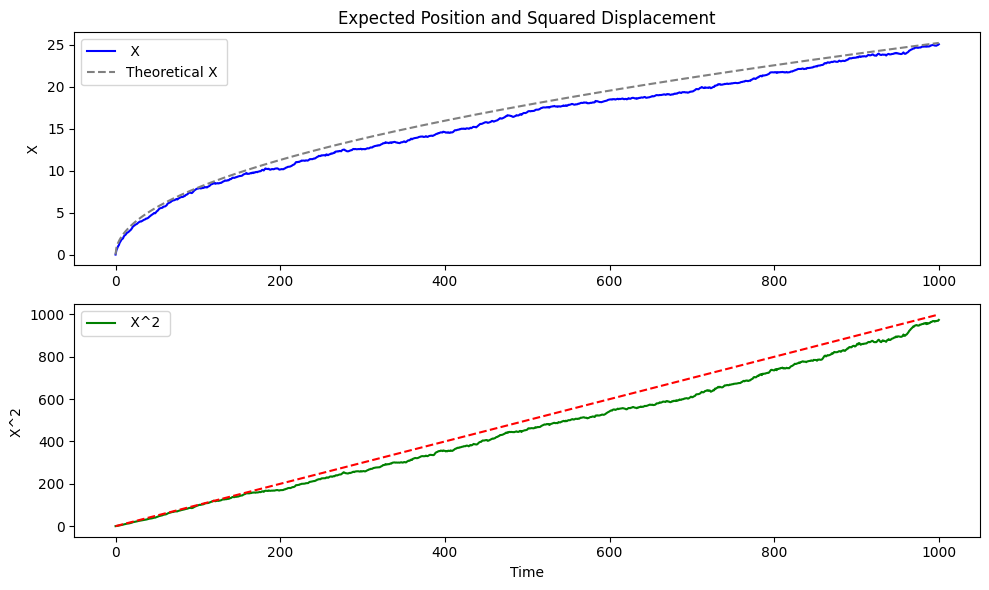

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_with_reflecting_boundary(steps, L=None):
    """Simulate a 1D random walk with a reflecting boundary at x=0."""
    position = 0
    positions = [position]

    for _ in range(steps):
        step = np.random.choice([-1, 1])
        position += step

        # Reflecting boundary at x=0
        if position < 0:
            position = 0

        positions.append(position)

    return positions

# Parameters
steps = 1000  # Number of steps
num_simulations = 500  # Number of random walk simulations
positions_all = []

# Simulate multiple random walks
for _ in range(num_simulations):
    positions_all.append(random_walk_with_reflecting_boundary(steps))

# Compute <X> and <X^2>
time = np.arange(steps + 1)
X_mean = np.mean([positions[:steps + 1] for positions in positions_all], axis=0)
X_squared_mean = np.mean([np.array(positions[:steps + 1])**2 for positions in positions_all], axis=0)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot <X>
plt.subplot(2, 1, 1)
plt.plot(time, X_mean, label=r" X ", color="blue")
plt.plot(time, np.sqrt(2*time / np.pi), color="gray", linestyle="--", label="Theoretical X ")
plt.title("Expected Position and Squared Displacement")
plt.ylabel(r" X ")
plt.legend()

# Plot <X^2>
plt.subplot(2, 1, 2)
plt.plot(time, X_squared_mean, label=r" X^2 ", color="green")
plt.plot(time, time, linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel(r"X^2 ")
plt.legend()

plt.tight_layout()
plt.show()


the half life is 69.31471805599453


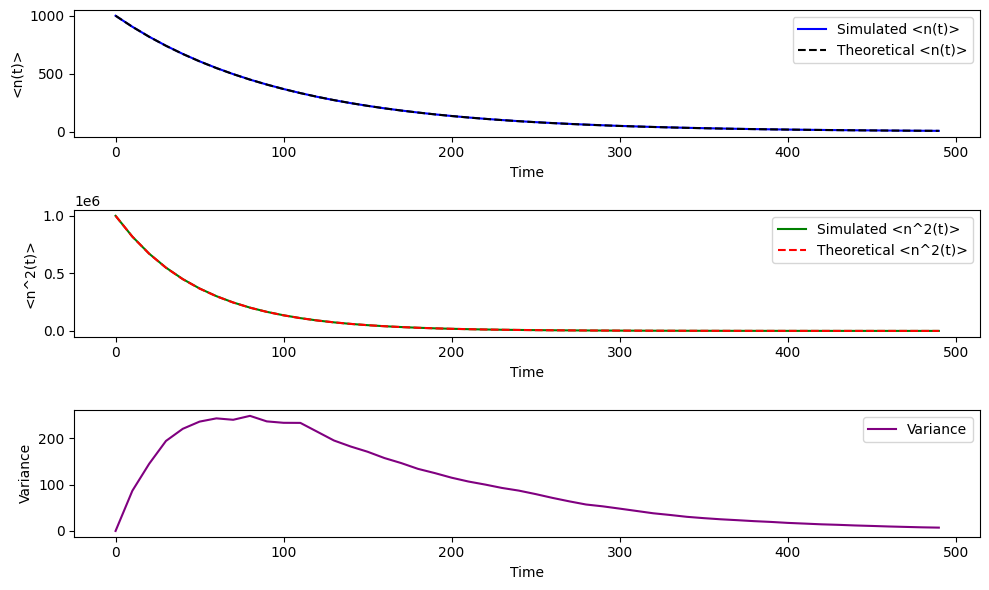

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_decay_simulation(N0, decay_constant, time_steps):
    """
    Simulates radioactive decay and calculates <n(t)>, <n^2(t)>, and variance.

    Args:
        N0: Initial number of atoms.
        decay_constant: Decay constant (lambda).
        time_steps: Array of time points to simulate.

    Returns:
        A tuple containing:
        - mean_atoms: Array of <n(t)> values.
        - mean_atoms_squared: Array of <n^2(t)> values.
        - variance: Array of variance values.
    """

    num_simulations = 1000  # Number of simulation runs
    num_times = len(time_steps)
    atoms_remaining = np.zeros((num_simulations, num_times))

    for sim in range(num_simulations):
        num_atoms = N0
        for i, t in enumerate(time_steps):
            # Probability of decay in this time step
            prob_decay = 1 - np.exp(-decay_constant * (time_steps[i] - (time_steps[i-1] if i>0 else 0))) if i>0 else 1-np.exp(-decay_constant * time_steps[i])
            
            # Number of atoms that decay in this time step (binomial distribution)
            num_decayed = np.random.binomial(num_atoms, prob_decay)
            num_atoms -= num_decayed
            atoms_remaining[sim, i] = num_atoms

    mean_atoms = np.mean(atoms_remaining, axis=0)
    mean_atoms_squared = np.mean(atoms_remaining**2, axis=0)

    # Calculate variance
    variance = mean_atoms_squared - mean_atoms**2

    return mean_atoms, mean_atoms_squared, variance


# Example usage:
N0 = 1000  # Initial number of atoms
decay_constant = 0.01  # Decay constant (adjust as needed)
half_life = np.log(2)/decay_constant
print(f"the half life is {half_life}")
time_steps = np.arange(0, 500, 10)  # Time points to simulate

mean_n, mean_n_squared, variance = radioactive_decay_simulation(N0, decay_constant, time_steps)

# Theoretical Calculation
theoretical_n = N0 * np.exp(-decay_constant * time_steps)
theoretical_n_squared = N0**2 * np.exp(-2*decay_constant*time_steps)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(time_steps, mean_n, label="Simulated <n(t)>", color="blue")
plt.plot(time_steps, theoretical_n, linestyle="--", color="black", label="Theoretical <n(t)>")
plt.xlabel("Time")
plt.ylabel("<n(t)>")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_steps, mean_n_squared, label="Simulated <n^2(t)>", color="green")
plt.plot(time_steps, theoretical_n_squared, linestyle="--", color="red", label="Theoretical <n^2(t)>")
plt.xlabel("Time")
plt.ylabel("<n^2(t)>")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_steps, variance, label="Variance", color="purple")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.legend()

plt.tight_layout()
plt.show()

Expected time to return to position 0: 18.35425101214575 steps


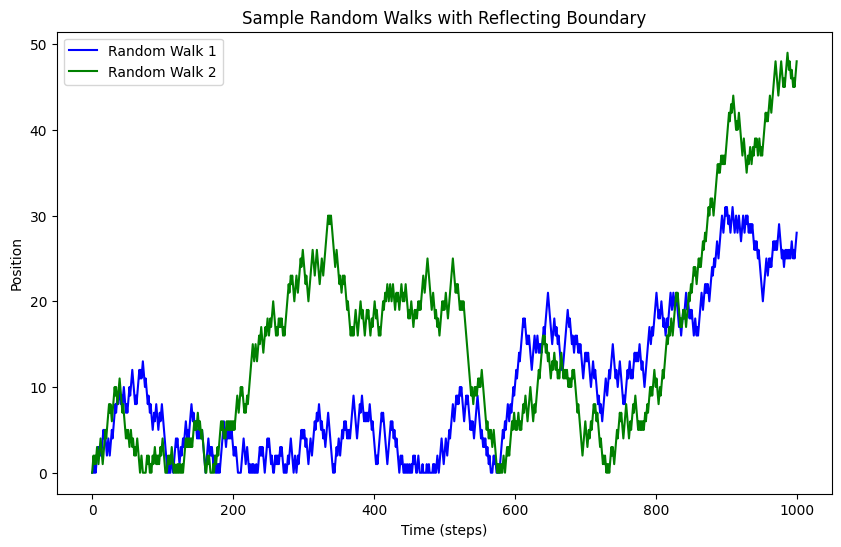

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_with_reflecting_boundary(steps, L=None):
    """Simulate a 1D random walk with a reflecting boundary at x=0 and return the time to first return to 0."""
    position = 0
    positions = [position]
    return_time = None

    for step_num in range(steps):
        step = np.random.choice([-1, 1])
        position += step

        # Reflecting boundary at x=0
        if position < 0:
            position = 0

        positions.append(position)

        # Check if the particle returns to position 0
        if position == 0 and return_time is None and step_num > 0:
            return_time = step_num
    
    return positions, return_time

# Parameters
steps = 1000  # Number of steps
num_simulations = 500  # Number of random walk simulations
return_times = []

# Simulate multiple random walks
for _ in range(num_simulations):
    positions, return_time = random_walk_with_reflecting_boundary(steps)
    if return_time is not None:
        return_times.append(return_time)

# Compute the expected return time
expected_return_time = np.mean(return_times)

# Print the result
print(f"Expected time to return to position 0: {expected_return_time} steps")

# Optionally, plot the positions of a few random walks to visualize the behavior
plt.figure(figsize=(10, 6))
plt.plot(np.arange(steps+1), positions_all[0][:steps+1], label="Random Walk 1", color="blue")
plt.plot(np.arange(steps+1), positions_all[1][:steps+1], label="Random Walk 2", color="green")
plt.title("Sample Random Walks with Reflecting Boundary")
plt.xlabel("Time (steps)")
plt.ylabel("Position")
plt.legend()
plt.show()
